In [1]:


# Import libraries
from pyswmm import Simulation, Nodes
from StormReactor import waterQuality, WQStorage
import matplotlib.pyplot as plt

from swmmio import Model
mdl = Model(r'StormReactor/examples/Example1_WQ.inp')

# Define water quality configuration dictionary

# TODO: change config to a class; will be cleaner than nested dictionaries
# NOTE: parameters are method-dependant, everything else is pretty standardized


from StormReactor import WQConfig


configs = []



config = WQConfig(
    element_id='10',
    element_type='link',
    pollutant='TSS',
    method='SewageFlux',
    parameters={"Smax":10, "Qhalf":10, "v_sett":1})
configs.append(config)

# Create lists to save TSS results
UpstreamNode_TSS = []
WQNode_TSS = []
OutfallNode_TSS = []
ok = []
# Initalize SWMM simulation
with Simulation(r'StormReactor/examples/Example1_WQ.inp') as sim:
    # Node information
    UpstreamNode = Nodes(sim)['24']
    WQNode = Nodes(sim)['17']
    OutfallNode = Nodes(sim)['18']

    # Initialize StormReactor
    WQ = waterQuality(sim, configs)

    # Launch a simulation
    for step in sim:
        # Update water quality each simulation step
        WQ.updateWQState()
        ok.append(WQ.storage.df.iloc[0,0])
        # Get and save TSS concentrations
        UpstreamNode_TSS.append(UpstreamNode.pollut_quality['TSS'])
        WQNode_TSS.append(WQNode.pollut_quality['TSS'])
        OutfallNode_TSS.append(OutfallNode.pollut_quality['TSS'])

# Plot TSS concentrations
plt.plot(UpstreamNode_TSS, ':', label="Upstream Node")
plt.plot(WQNode_TSS, '-', label="WQ Node")
plt.plot(OutfallNode_TSS, '--',label="Outfall")
plt.xlabel("Time")
plt.ylabel("TSS (mg/L)")
plt.legend()
plt.show()

NameError: name 'wqConfig' is not defined

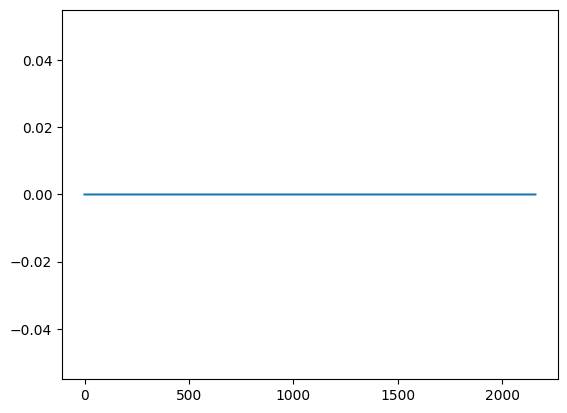

In [ ]:
plt.plot(ok)

In [ ]:
resus = []
Q = [1,2,1,1,2,1,2,1,1,1,1,1,2,1,3,4,5,6,7,8,9,21,43,21,11,2,1,2,3,2,1]
for Qt in Q:
    resus.append(10 * Qt/(Qt+1))


In [ ]:
Q[19]

8

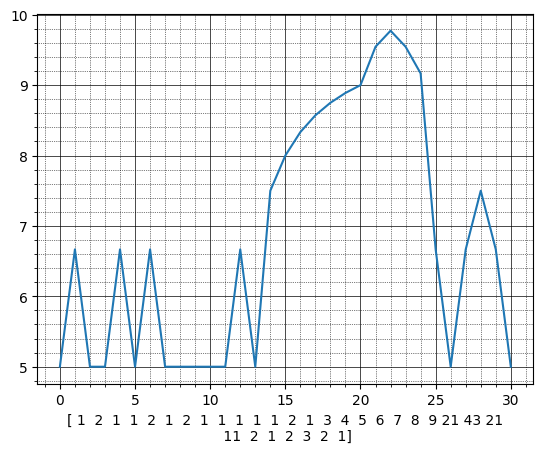

In [ ]:
import numpy as np
plt.plot(resus)
plt.xlabel(np.array(Q))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.show()